In [1]:
import INMET
inmet = INMET.api_inmet()

In [2]:
# Questão 1 - a
lista_estacoes_automaticas = inmet.requisita_estacoes(tipo='M')
serie_de_14_dias = inmet.requisita_diario(data_inicial='2021-09-01', data_final='2021-09-15', cod_estacao='A301')

In [ ]:
# print saídas
lista_estacoes_automaticas

In [ ]:
serie_de_14_dias

# CONVERSÃO PARA DATAFRAME

In [6]:
import json
import pandas as pd

In [7]:
estacoes_json = json.loads(lista_estacoes_automaticas)
serie_json = json.loads(serie_de_14_dias)


df_estacoes = pd.DataFrame.from_dict(estacoes_json)
df_serie = pd.DataFrame.from_dict(serie_json)

In [14]:
#print de dataframes
df_estacoes
df_serie

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,83.5,2021-09-01,RECIFE,60,24,6.6,-8.05916666,20.8,28.1,PE,1.5,A301,-34.95916666
1,84.3,2021-09-02,RECIFE,60,23.5,1,-8.05916666,19.5,28.6,PE,1.3,A301,-34.95916666
2,87.7,2021-09-03,RECIFE,65,24.3,0,-8.05916666,20.9,29.3,PE,1,A301,-34.95916666
3,83.4,2021-09-04,RECIFE,59,25.8,1,-8.05916666,22.3,30,PE,1.4,A301,-34.95916666
4,86,2021-09-05,RECIFE,64,25.4,1.4,-8.05916666,23.1,29.4,PE,1.4,A301,-34.95916666
5,82.3,2021-09-06,RECIFE,59,25,0,-8.05916666,21.4,29.6,PE,1.3,A301,-34.95916666
6,81.8,2021-09-07,RECIFE,45,24.8,0.4,-8.05916666,20.7,30.6,PE,1.1,A301,-34.95916666
7,78.1,2021-09-08,RECIFE,60,25.5,0.6,-8.05916666,23.4,29.4,PE,1.7,A301,-34.95916666
8,83.1,2021-09-09,RECIFE,61,24.5,2.2,-8.05916666,20.7,29.4,PE,1.3,A301,-34.95916666
9,81.5,2021-09-10,RECIFE,61,24.8,0.2,-8.05916666,20.6,29.5,PE,1.5,A301,-34.95916666


# PLOT

In [18]:
import matplotlib.pyplot as plt

In [13]:
estacao1 = ana.requisita_diario(data_inicial='2021-09-01', data_final='2021-09-15', cod_estacao='A301')
estacao2 = ana.requisita_diario(data_inicial='2021-09-01', data_final='2021-09-15', cod_estacao='82590')

In [15]:
json1 = json.loads(estacao1)
json2 = json.loads(estacao2)

df1 = pd.DataFrame.from_dict(json1)
df2 = pd.DataFrame.from_dict(json2)

In [38]:
# TRATAMENTO DE DADOS
periodo = pd.date_range(start='2021-09-01',end='2021-09-15',freq='D')

dados1 = pd.to_numeric(df1['UMID_MED'], downcast="float")
dados2 = pd.to_numeric(df2['UMID_MED'], downcast="float")

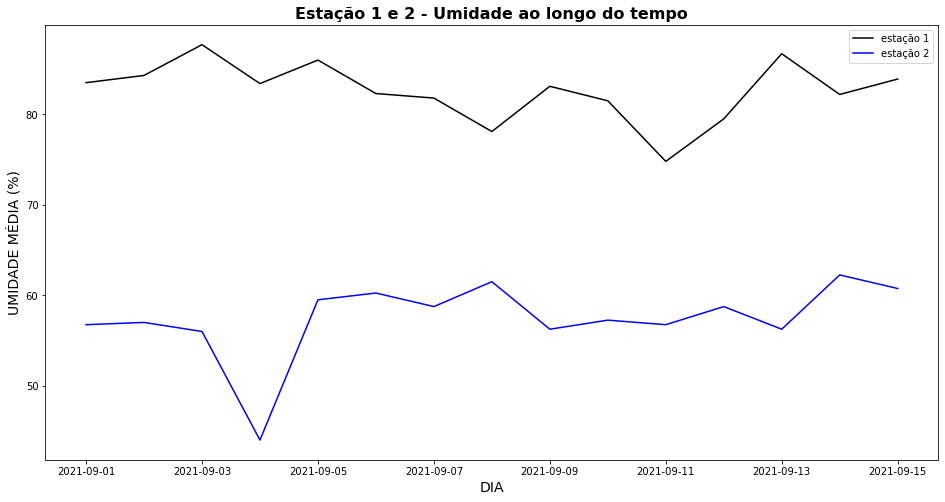

In [39]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(periodo, dados1, 'k', label='estação 1')
ax.plot(periodo, dados2, 'b', label='estação 2')
ax.set_ylabel('UMIDADE MÉDIA (%)', fontsize=14)
ax.set_xlabel('DIA', fontsize=14)
ax.set_title(f'Estação 1 e 2 - Umidade ao longo do tempo', fontsize=16, weight='bold')

plt.legend()